In [14]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
dataset=pd.read_csv("~/python/clustering/dataset/segmentation data.csv")

In [16]:
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [17]:
dataset.iloc[:,[3,5]]=(dataset.iloc[:,[3,5]]-dataset.iloc[:,[3,5]].min())/(dataset.iloc[:,[3,5]].max()-dataset.iloc[:,[3,5]].min())
dataset.iloc[:,4]=dataset.iloc[:,4]/3
dataset.iloc[:,3]=dataset.iloc[:,3]*2
dataset.iloc[:,5]=5*(dataset.iloc[:,5])
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,1.689655,0.666667,1.623905,1,2
1,100000002,1,1,0.137931,0.333333,2.101052,1,2
2,100000003,0,0,1.068966,0.333333,0.975718,0,0
3,100000004,0,0,0.931034,0.333333,2.481117,1,1
4,100000005,0,0,1.206897,0.333333,2.069209,1,1


In [22]:
minibatch_kmeans_model=MiniBatchKMeans(n_clusters=7,init="k-means++",max_iter=10000,batch_size=256)
#create model

In [42]:
x=dataset.iloc[:,[3,4,5]]
x_train,x_test=train_test_split(x,test_size=0.2)
#determine array

In [47]:
minibatch_kmeans_model=minibatch_kmeans_model.fit(x_train)
#fit model

In [48]:
minibatch_kmeans_model.cluster_centers_
#return res

array([[1.39952978, 0.64141414, 2.13313356],
       [0.43090287, 0.30856658, 1.15811148],
       [1.03973588, 0.46241135, 1.45452421],
       [0.94763729, 0.49002849, 3.54486054],
       [0.38452093, 0.24927815, 0.65494458],
       [0.38141138, 0.26189204, 1.59617844],
       [0.55791335, 0.30091365, 2.27589252]])

In [51]:
x_train["cluster"]=minibatch_kmeans_model.labels_
#signed labels for train test

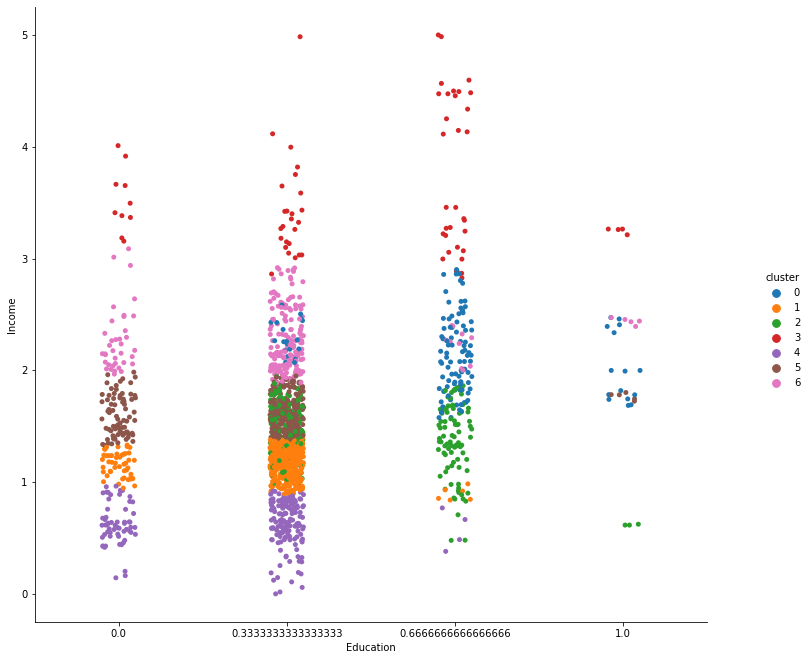

In [53]:
g = sns.catplot(data=x_train, x='Education',
                y='Income', hue='cluster')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#visualize res for train test

In [54]:
pred_res=minibatch_kmeans_model.predict(x_test)
#resigned cluster

In [58]:
x_test["cluster"]=pred_res

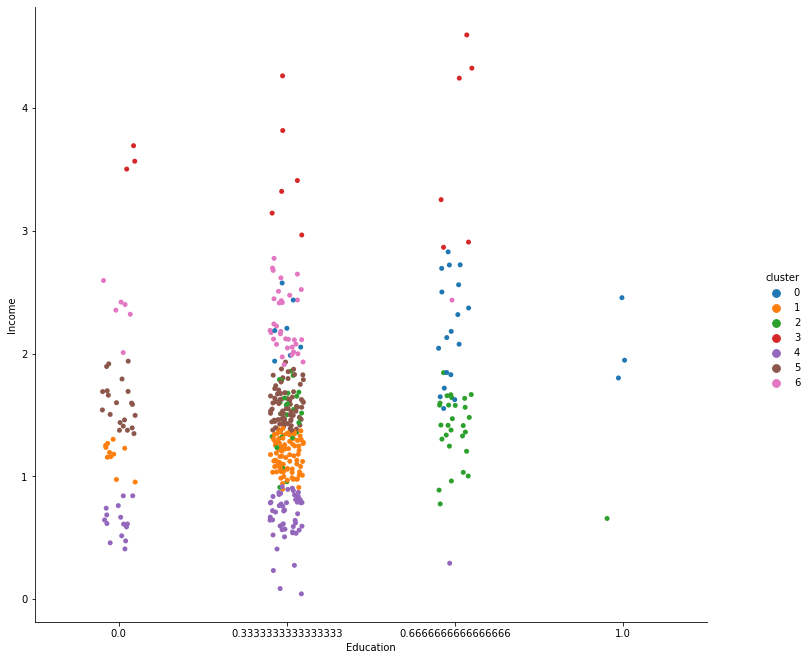

In [60]:
g = sns.catplot(data=x_test, x='Education',
                y='Income', hue='cluster')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#visualize res for test res